In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("solarpowergeneration.csv")

In [5]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [6]:
df.shape

(2920, 10)

In [38]:
df.isnull()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2915,False,False,False,False,False,False,False,False,False,False
2916,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,False,False,False,False,False
2918,False,False,False,False,False,False,False,False,False,False


In [8]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [10]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [11]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1529
dtype: int64

In [32]:
# sumarry statistics
summary_stats= df.describe()
print(summary_stats)

       distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.0000

In [44]:
from scipy.stats import skew,kurtosis

# Compute skewness & kurtosis for each numerical column
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col}:skweness = {skew(df[col])},Kurtosis = {kurtosis(df[col])}")

distance-to-solar-noon:skweness = 0.21134320534930362,Kurtosis = -0.9876702546562699
temperature:skweness = 0.12585143292146822,Kurtosis = -0.28896437993228163
wind-direction:skweness = -1.6286820343743007,Kurtosis = 1.8513899851275664
wind-speed:skweness = 0.41663716234376796,Kurtosis = 0.07641708048304796
sky-cover:skweness = 0.08024284663711184,Kurtosis = -1.3412145724387403
visibility:skweness = -3.8604618063924376,Kurtosis = 15.689537558592292
humidity:skweness = -0.955116245900621,Kurtosis = 0.8686720932862335
average-wind-speed-(period):skweness = nan,Kurtosis = nan
average-pressure-(period):skweness = 0.44115698008250664,Kurtosis = 0.34965226250469916
power-generated:skweness = 1.3063635464265997,Kurtosis = 0.33956634120006557


In [54]:
df['visibility']= np.log1p(df['visibility']) #log transformation
df['power-generated']= np.sqrt(df['power-generated']) #squre root transformation
df['power-generated']

0         0.000000
1         0.000000
2        73.607065
3       159.615162
4       173.404152
           ...    
2915     83.636117
2916    171.726527
2917    131.365901
2918     26.019224
2919      0.000000
Name: power-generated, Length: 2920, dtype: float64

In [56]:
from scipy.stats import zscore 

# compute zscore for numerical columns
df_zscores = df.select_dtypes(include=['number']).apply(zscore)

# Identify outliers (|Z-score| > 3)
outliers = (df_zscores.abs() > 3).any(axis=1)

# Display outliers
print("Outliers found:", df[outliers])


Outliers found:       distance-to-solar-noon  temperature  wind-direction  wind-speed  \
4                   0.065553           69              28         7.5   
5                   0.296915           69              28         7.5   
12                  0.065722           72              29         6.8   
21                  0.298836           73              29         7.9   
30                  0.533074           76              30         6.9   
...                      ...          ...             ...         ...   
2042                0.359155           60              27        21.5   
2068                0.063011           74              30         9.0   
2524                0.050401           70              28        10.6   
2882                0.393671           71              29         9.8   
2893                0.290978           78              29         6.6   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
4             0    1.223156        21

In [86]:
import numpy as np

# select the numerical column
numerical_cols=['distance-to-solar-noon','temperature','wind-direction','wind-speed','sky-cover','visibility',
               'humidity','average-wind-speed-(period)','average-pressure-(period)','power-generated']

#compute IQR for each features
for col in numerical_cols:
    Q1=np.percentile(df[col],25) # 25th percentile (Q1)
    Q3=np.percentile(df[col],75) # 75th percentile (Q3)
    IQR=Q3-Q1 #compute IQR

    #Define outlier bonds
    lower_bonds= Q1 - 1.5 * IQR
    upper_bonds= Q3 - 1.5 * IQR

    


In [88]:
# Remove outliers from all numerical columns
for col in numerical_cols:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only non-outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed. New dataset shape:", df.shape)


Outliers removed. New dataset shape: (2001, 10)


<function matplotlib.pyplot.show(close=None, block=None)>

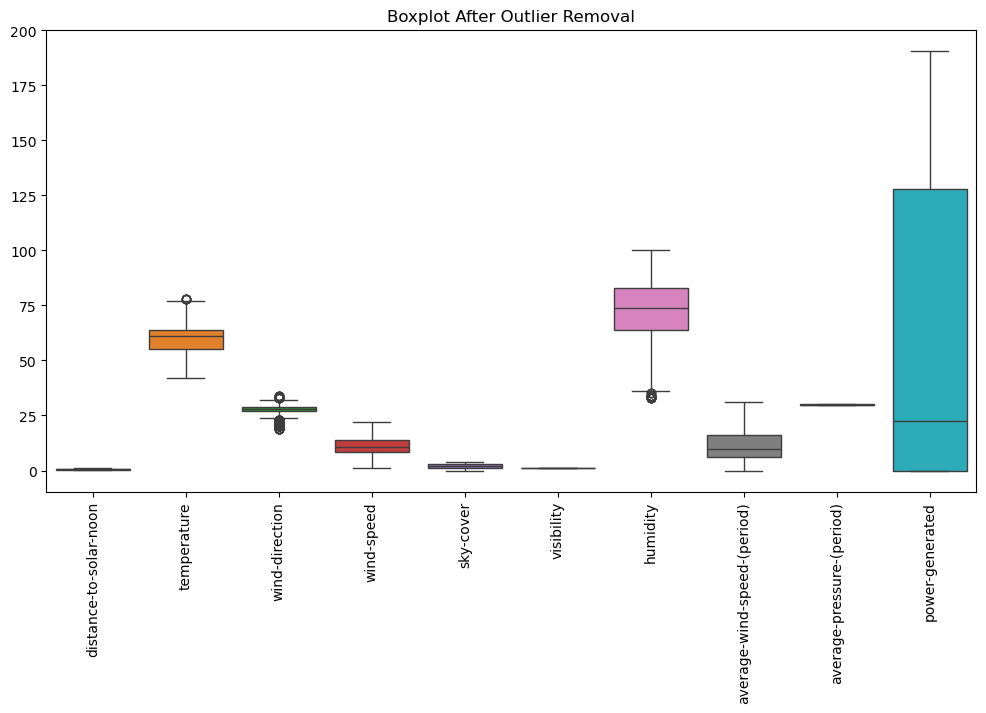

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Removal")
plt.show

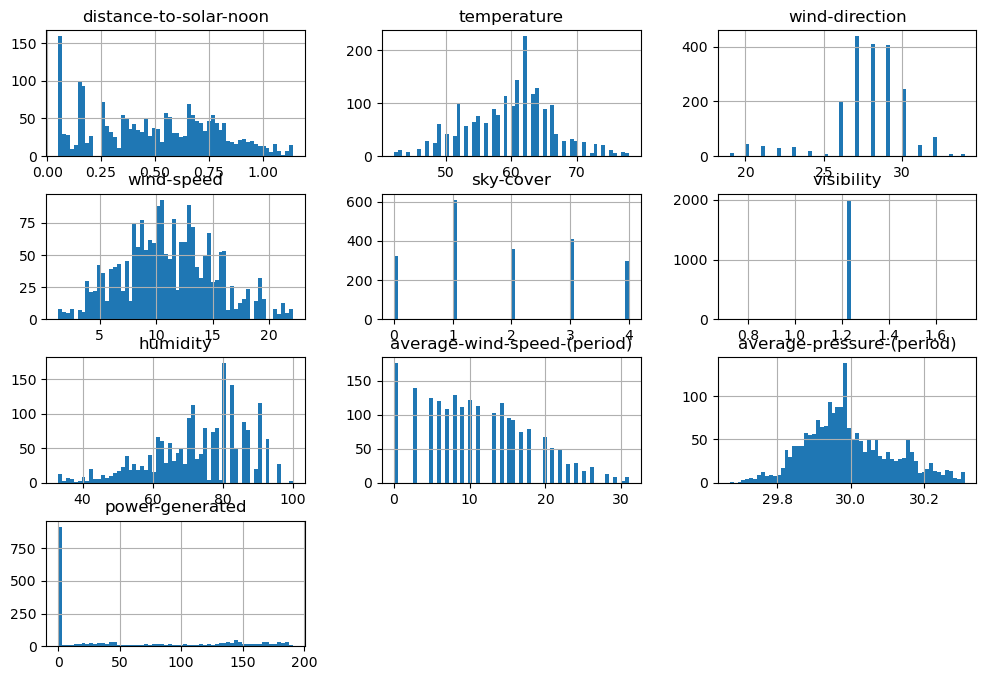

In [110]:
df.hist(figsize=(12, 8), bins=60)
plt.show()


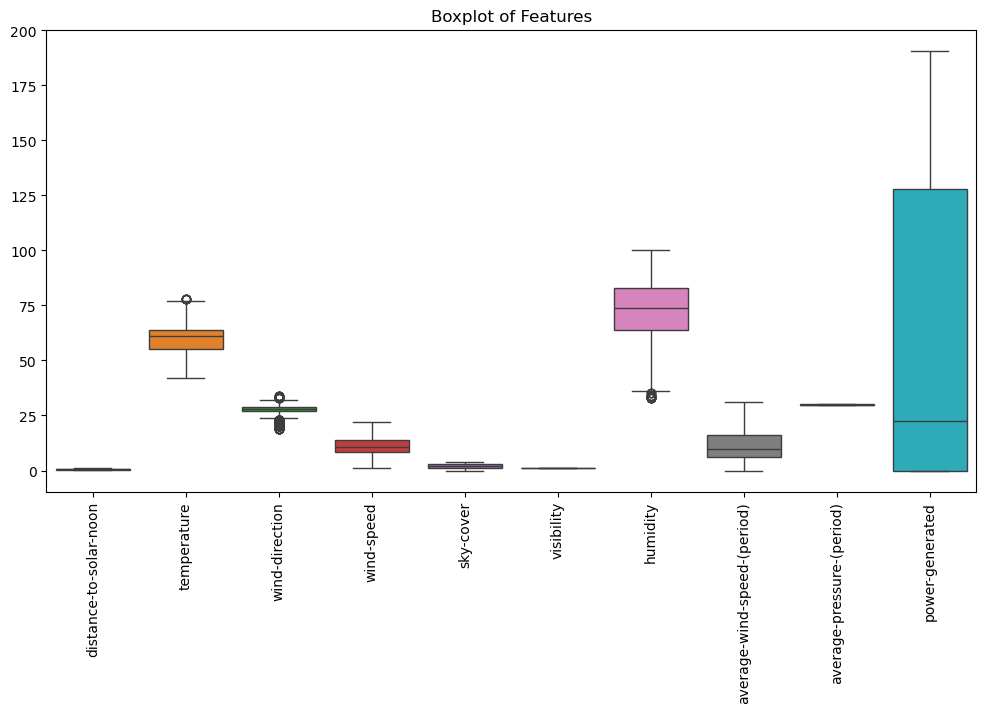

In [112]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")#boxplot outliers.
plt.show()

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
corelation=df.corr(numeric_only=True)
corelation

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.126752,0.012771,-0.143734,0.008609,NaN,0.501279,-0.244281,0.081102,-0.873537
temperature,-0.126752,1.000000,0.244768,-0.069097,-0.199471,NaN,-0.123464,-0.079706,-0.472472,0.075913
wind-direction,0.012771,0.244768,1.000000,-0.132626,-0.388104,NaN,-0.125749,-0.078847,-0.062755,0.044645
wind-speed,-0.143734,-0.069097,-0.132626,1.000000,0.119000,NaN,0.015992,0.604003,-0.190401,0.116924
sky-cover,0.008609,-0.199471,-0.388104,0.119000,1.000000,NaN,0.332938,0.025154,0.052533,-0.119961
visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,0.501279,-0.123464,-0.125749,0.015992,0.332938,NaN,1.000000,-0.264986,0.057838,-0.606007
average-wind-speed-(period),-0.244281,-0.079706,-0.078847,0.604003,0.025154,NaN,-0.264986,1.000000,-0.147326,0.310384
average-pressure-(period),0.081102,-0.472472,-0.062755,-0.190401,0.052533,NaN,0.057838,-0.147326,1.000000,-0.017394
power-generated,-0.873537,0.075913,0.044645,0.116924,-0.119961,NaN,-0.606007,0.310384,-0.017394,1.000000


<Axes: >

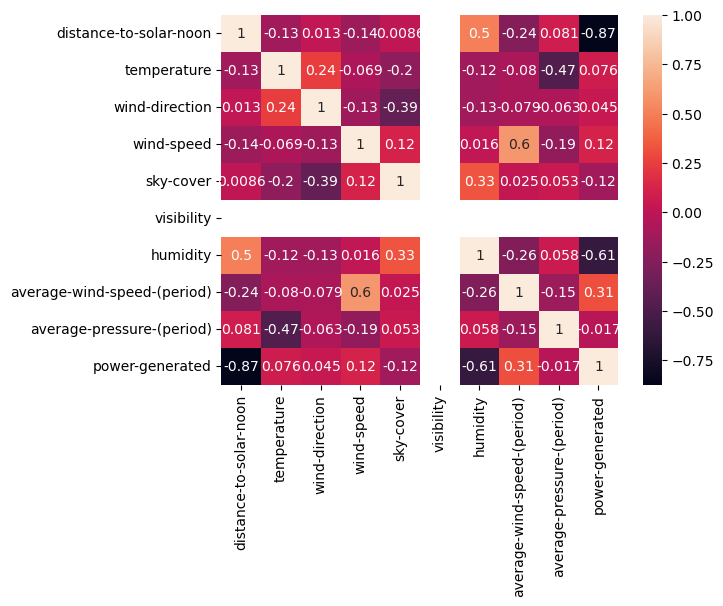

In [116]:
sns.heatmap(corelation,annot=True)

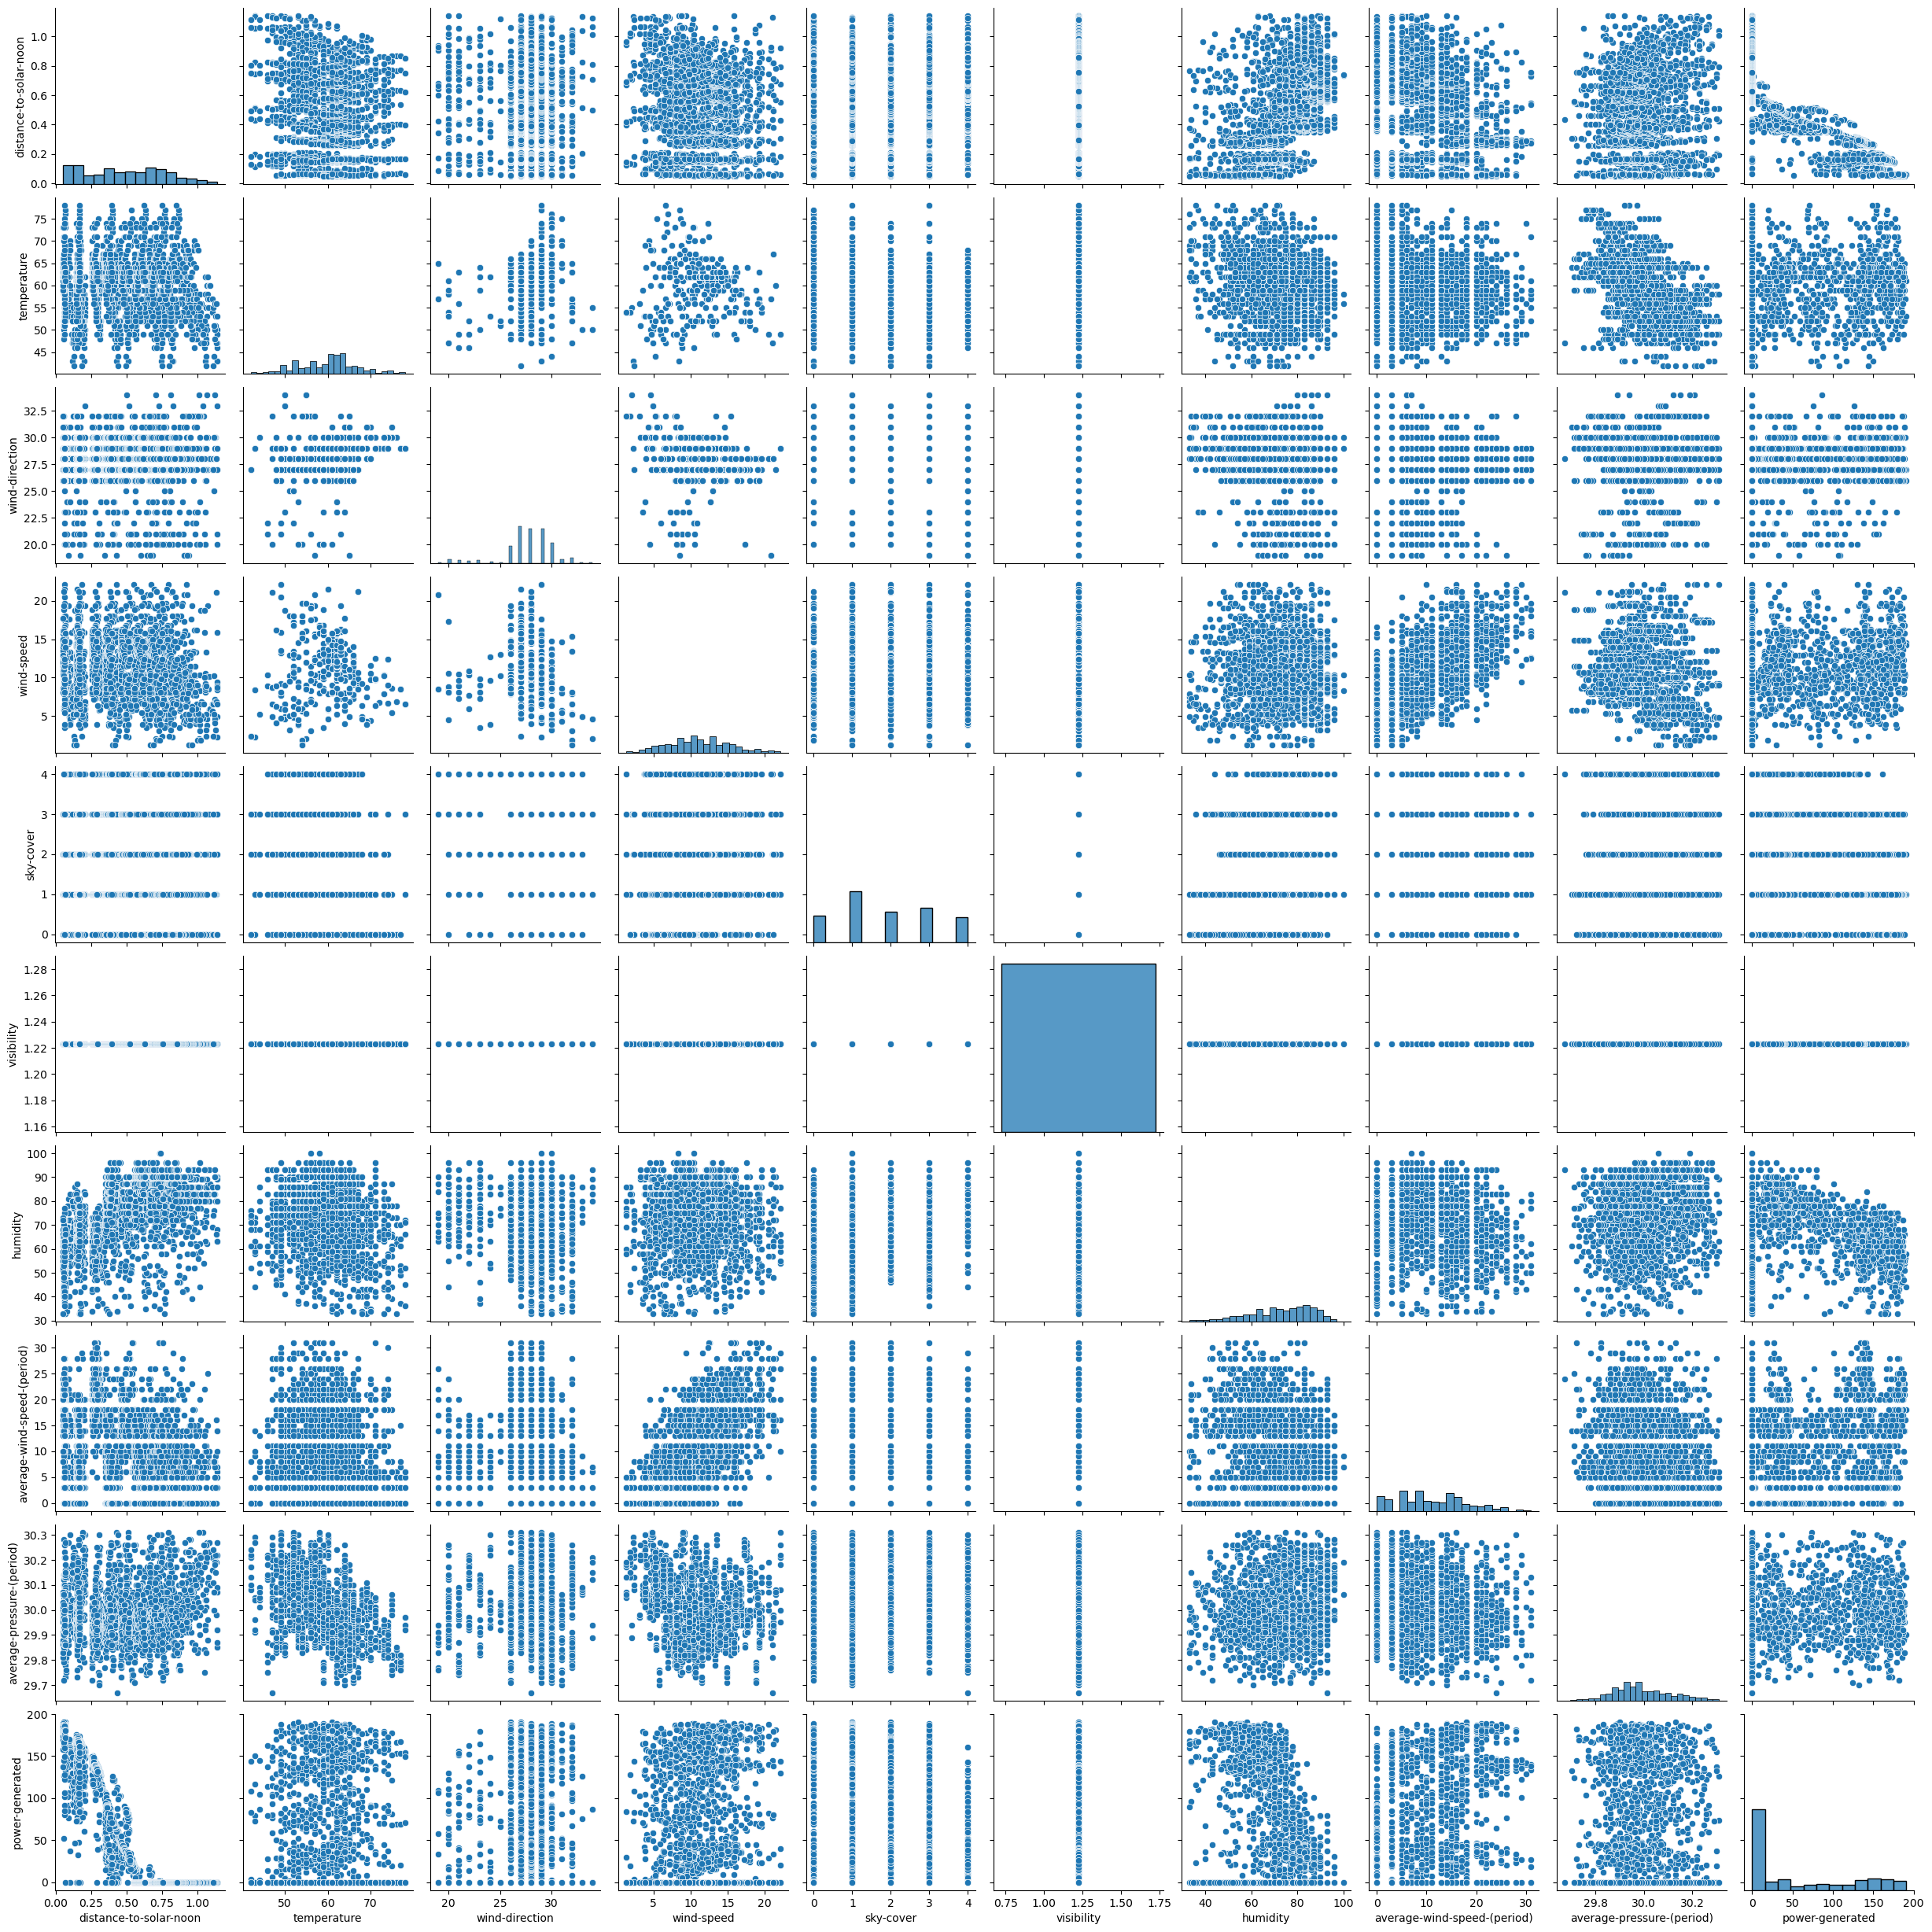

In [118]:
sns.pairplot(df)

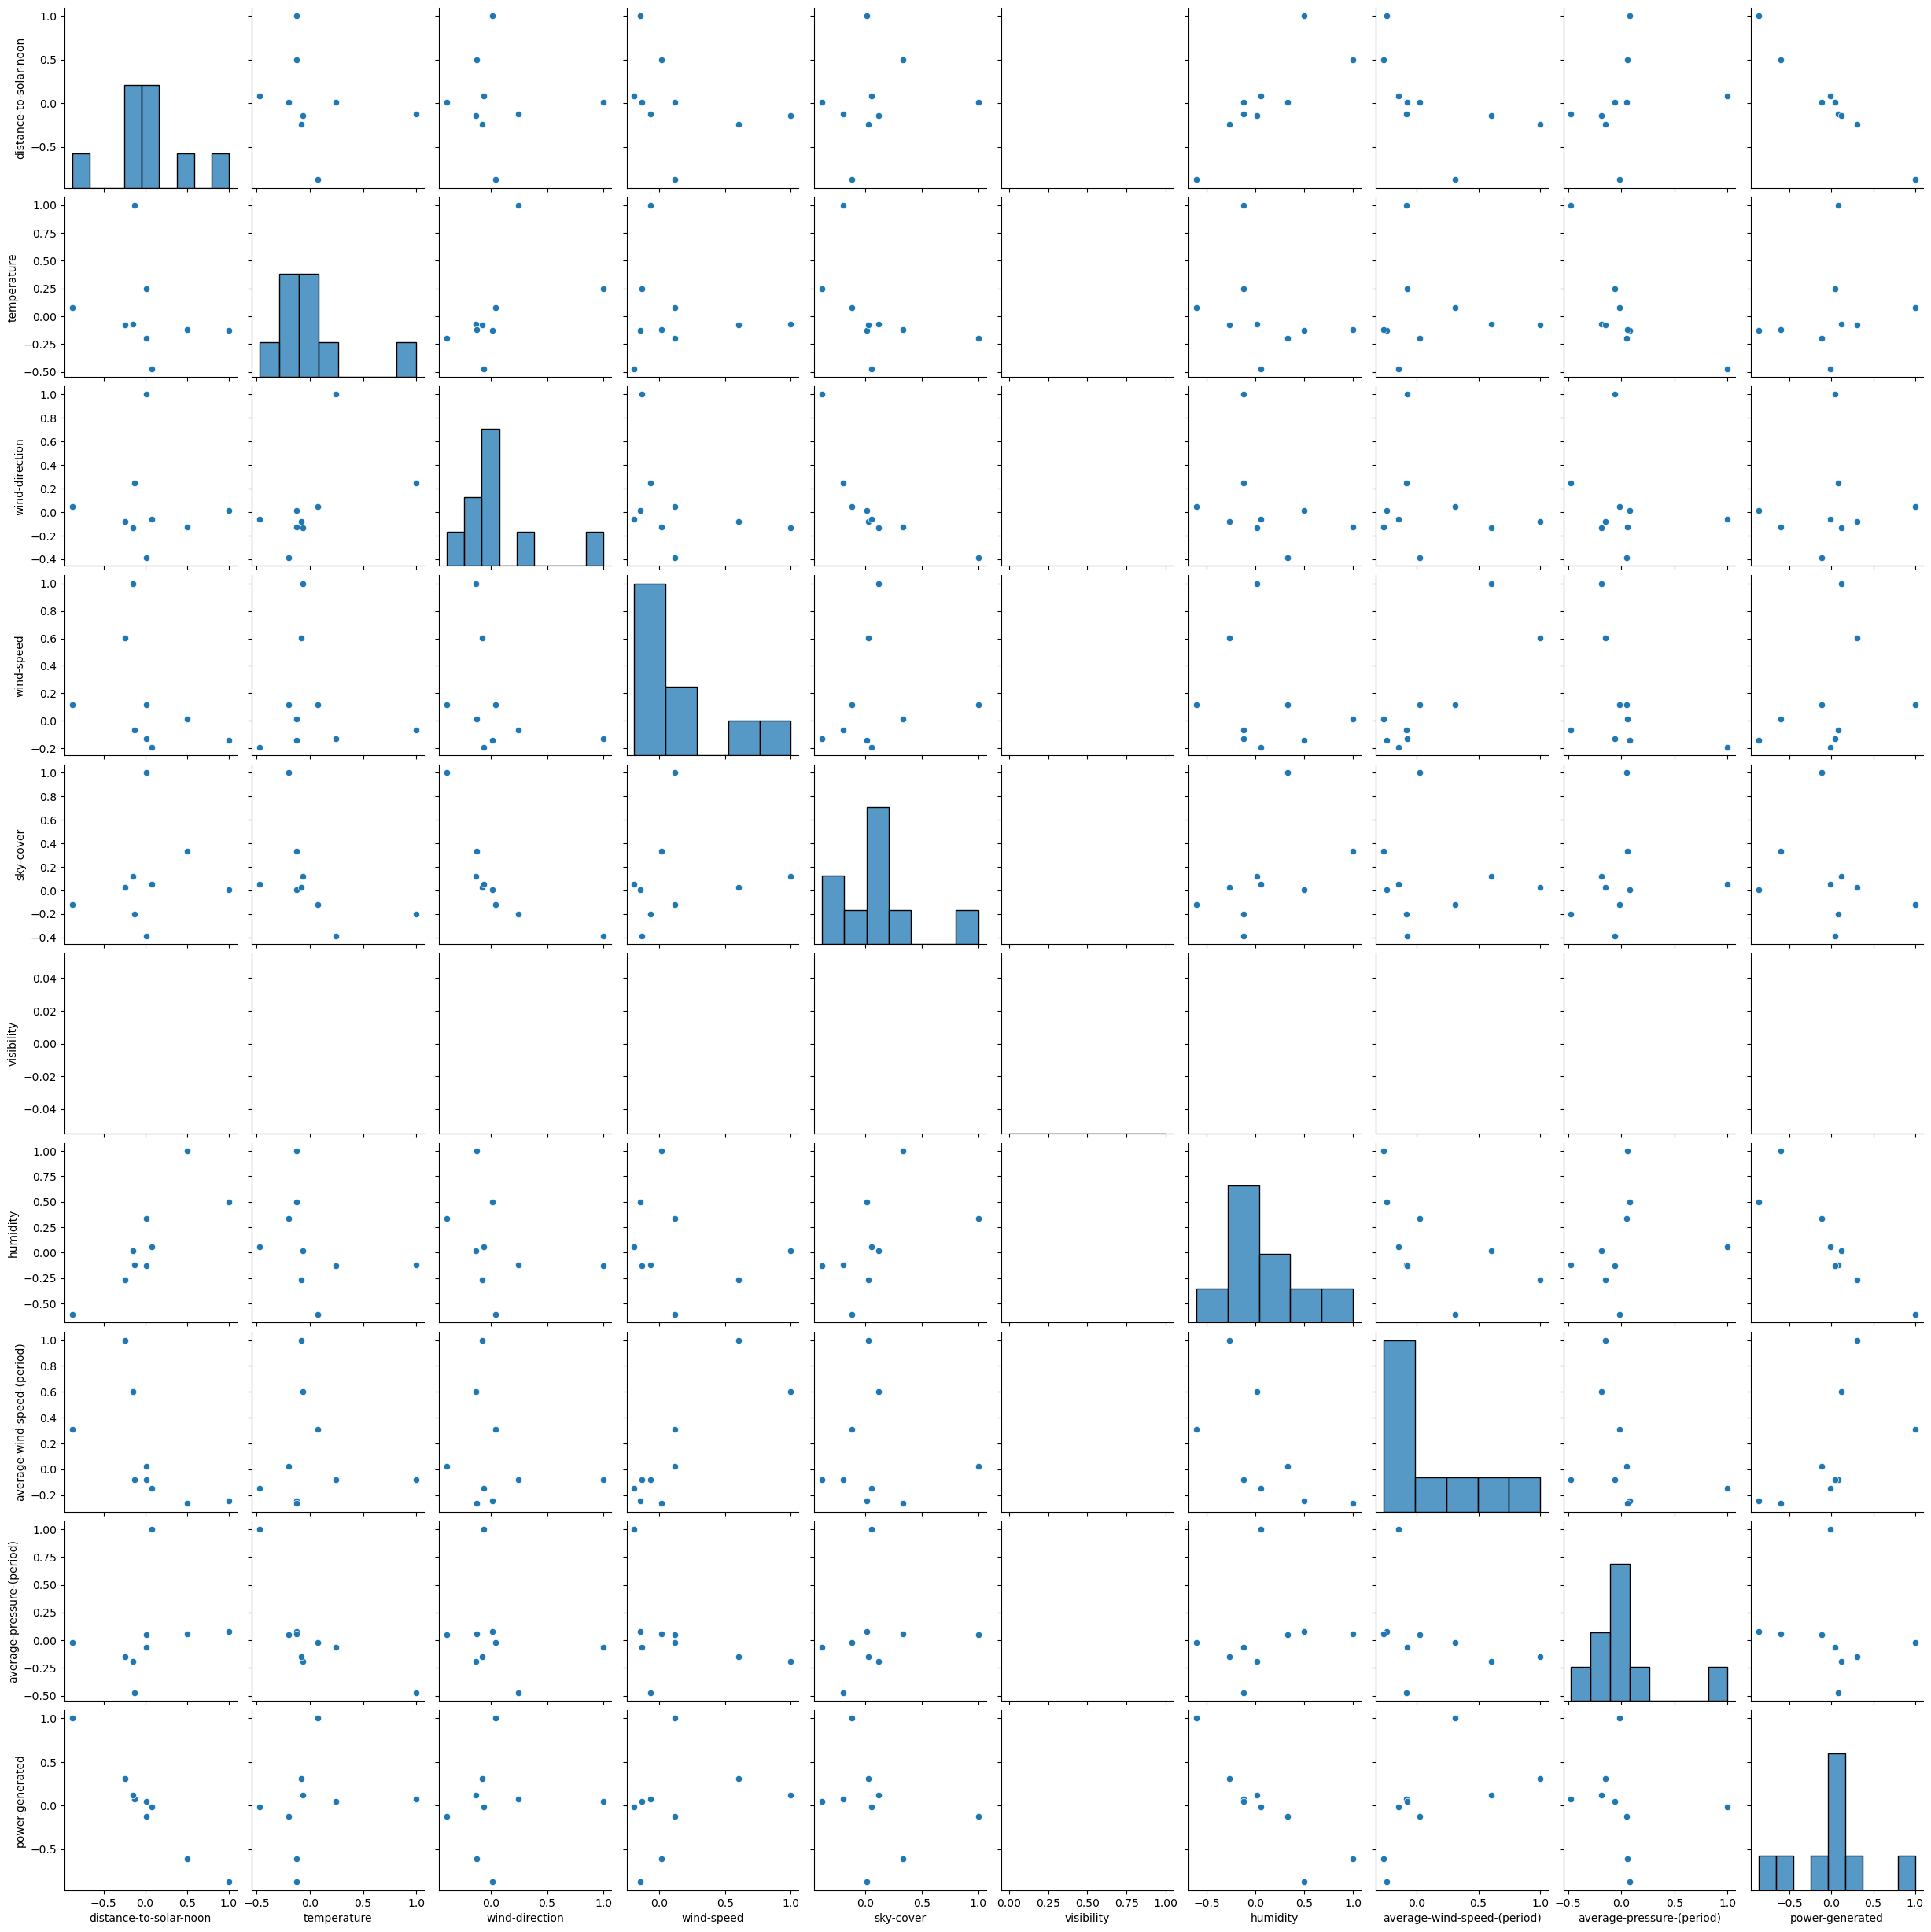

In [120]:
sns.pairplot(corelation)

<Axes: >

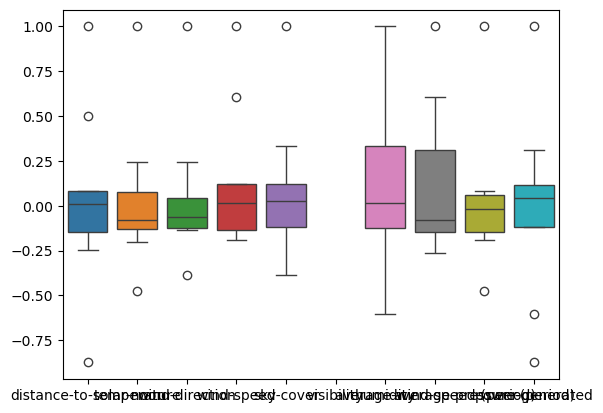

In [122]:
sns.boxplot(corelation)

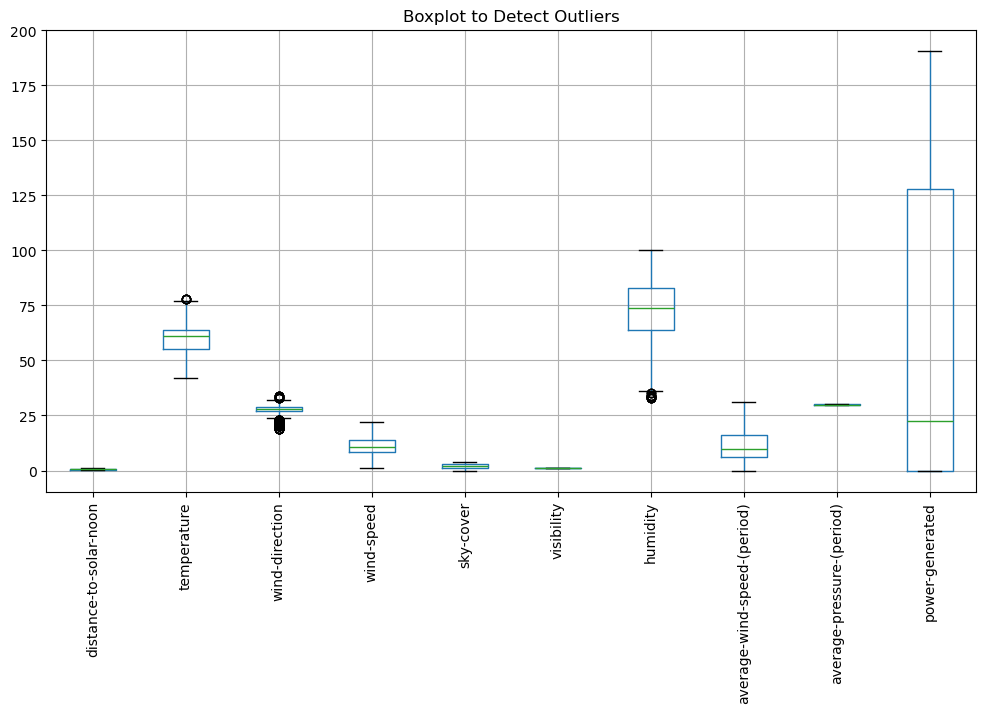

In [124]:
import matplotlib.pyplot as plt  

# Boxplot for each numerical feature  
df.boxplot(figsize=(12,6))  
plt.xticks(rotation=90)  
plt.title("Boxplot to Detect Outliers")  
plt.show()


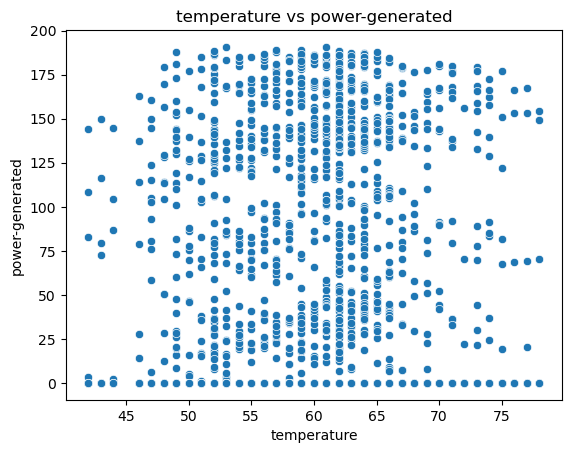

In [126]:
# Scatter plot of Solar Power vs. Temperature  
sns.scatterplot(x=df["temperature"], y=df["power-generated"])  
plt.title("temperature vs power-generated")  
plt.show()


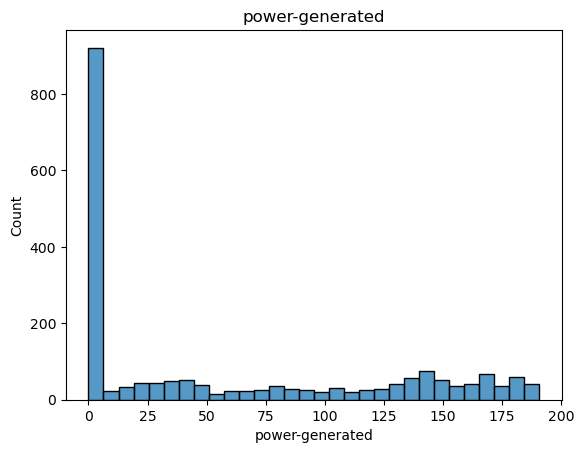

In [128]:
# Histogram of the target variable (power-generated)  
sns.histplot(df["power-generated"], bins=30, kde=False)  
plt.title("power-generated")  
plt.show()

In [132]:
df["distance-to-solar-noon"] = df["power-generated"] * df["temperature"]
df["distance-to-solar-noon"]

0           0.000000
1           0.000000
2        5078.887477
3       11013.446191
6        1565.859189
            ...     
2915     5269.075346
2916    10818.771187
2917     8276.051776
2918     1639.211091
2919        0.000000
Name: distance-to-solar-noon, Length: 2001, dtype: float64

In [134]:
y = df.iloc[:, -1]
y

0         0.000000
1         0.000000
2        73.607065
3       159.615162
6        22.693611
           ...    
2915     83.636117
2916    171.726527
2917    131.365901
2918     26.019224
2919      0.000000
Name: power-generated, Length: 2001, dtype: float64

In [136]:
x = df.iloc[:, 1:6]
x

,temperature,wind-direction,wind-speed,sky-cover,visibility
0,69,28,7.5,0,1.223156
1,69,28,7.5,0,1.223156
2,69,28,7.5,0,1.223156
3,69,28,7.5,0,1.223156
6,69,28,7.5,0,1.223156
...,...,...,...,...,...
2915,63,27,13.9,4,1.223156
2916,63,27,13.9,1,1.223156
2917,63,27,13.9,2,1.223156
2918,63,27,13.9,2,1.223156


In [138]:
categorical_columns =['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed','sky-cover', 'visibility', 'humidity',
                      'average-wind-speed-(period)','average-pressure-(period)', 'power-generated']
df_with_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_with_dummies

,distance-to-solar-noon_51.0,distance-to-solar-noon_91.7986928011505,distance-to-solar-noon_107.77754868245982,distance-to-solar-noon_151.43315356948753,distance-to-solar-noon_174.0,distance-to-solar-noon_175.7811138888362,distance-to-solar-noon_206.15528128088303,distance-to-solar-noon_250.0,distance-to-solar-noon_285.8898389240163,distance-to-solar-noon_290.292955477738,...,power-generated_187.75249665450522,power-generated_187.83503400590635,power-generated_188.16216410320115,power-generated_188.3454273402994,power-generated_188.3772810080876,power-generated_188.55503175465776,power-generated_188.77234967017813,power-generated_189.05819209968132,power-generated_190.70395905696347,power-generated_190.78784028338913
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2918,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sky-cover'] = le.fit_transform(df['sky-cover'])
df['sky-cover']

0       0
1       0
2       0
3       0
6       0
       ..
2915    4
2916    1
2917    2
2918    2
2919    1
Name: sky-cover, Length: 2001, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [154]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 5), (401, 5), (1600,), (401,))

In [156]:
y

0         0.000000
1         0.000000
2        73.607065
3       159.615162
6        22.693611
           ...    
2915     83.636117
2916    171.726527
2917    131.365901
2918     26.019224
2919      0.000000
Name: power-generated, Length: 2001, dtype: float64

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [160]:
x_train, x_test, y_train, y_test 

(      temperature  wind-direction  wind-speed  sky-cover  visibility
 262            65              19         8.5          4    1.223156
 2553           62              30        13.7          1    1.223156
 1293           48              29        16.2          1    1.223156
 520            53              30         3.8          0    1.223156
 2767           71              29        12.5          1    1.223156
 ...           ...             ...         ...        ...         ...
 1925           54              27        15.2          2    1.223156
 2144           60              30        11.4          0    1.223156
 1597           59              28        12.4          2    1.223156
 2323           66              29        11.0          1    1.223156
 1921           54              27        15.2          2    1.223156
 
 [1600 rows x 5 columns],
       temperature  wind-direction  wind-speed  sky-cover  visibility
 2254           62              26        11.2          4    1

In [162]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['power-generated'])
y = df['power-generated']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (1600, 9), Testing Set: (401, 9)
